013774228 - Sarathchandra makkena

## Problem 6.1  

### Part A Implementation 

## Importing the libraries used:

In [1]:
import numpy as np
from sklearn import neighbors
import math as math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Preparing the data 

In [2]:
X1 = [1, 0, 0, -1, 0, 0, -2]
X2 = [0, 1, -1, 0, 2, -2, 0]
y = [-1, -1, -1, -1, +1, +1, +1]

In [3]:
X = np.array([[X1[i], X2[i]] for i in range(len(X1))])
y = np.array([y[i] for i in range(len(y))])

In [4]:
X

array([[ 1,  0],
       [ 0,  1],
       [ 0, -1],
       [-1,  0],
       [ 0,  2],
       [ 0, -2],
       [-2,  0]])

In [5]:
y

array([-1, -1, -1, -1,  1,  1,  1])

## Running KNN Classifier with neighbours = 1 

In [6]:
n_neighbors = 1
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', metric='euclidean')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='distance')

## Plotting the decision boundary for knn with neighbours = 1

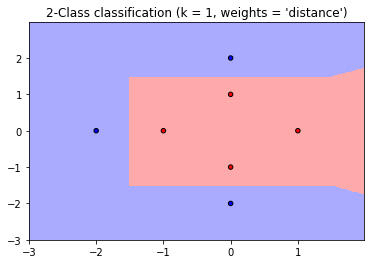

In [7]:

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'distance'))

plt.show()

## Running KNN Classifier with neighbours = 3

In [8]:
n_neighbors = 3
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', metric='euclidean')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

## Plotting the decision boundary for knn with neighbours = 3 

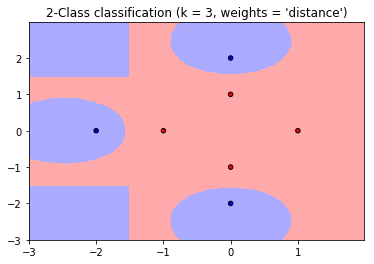

In [9]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'distance'))

plt.show()

## Part B Implementation

## Preparing the data: 

In [10]:
X1 = [1, 0, 0, -1, 0, 0, -2]
X2 = [0, 1, -1, 0, 2, -2, 0]
y = [-1, -1, -1, -1, +1, +1, +1]
X = np.array([[X1[i], X2[i]] for i in range(len(X1))])

Z1 = [np.sqrt(X1[i]**2 + X2[i]**2) for i in range(len(X1))]
y = np.array([y[i] for i in range(len(y))])

Z2 = []
for i in range(len(X2)):
    if X1[i] == 0 and X2[i] > 0:
        Z2.append(math.pi/2)
    elif X1[i] == 0 and X2[i] < 0:
        Z2.append(-1 * math.pi/2)
    elif X1[i] == 0 and X2[i] == 0:
        Z2.append(0)
    else:
        Z2.append(math.atan(X2[i]/X1[i]))

In [11]:
Z1

[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0]

In [12]:
Z2

[0.0,
 1.5707963267948966,
 -1.5707963267948966,
 -0.0,
 1.5707963267948966,
 -1.5707963267948966,
 -0.0]

In [13]:
Z_data = np.array([[Z1[i], Z2[i]] for i in range(len(Z1))])

## Running knn with neighbours = 1

n_neighbors = 1
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(Z_data, y)

## Function to handle negative and positive infinity transformation 

In [14]:
def myatan(row):
    x1 = row[0]
    x2 = row[1]
    if x1 == 0 and x2 == 0:
        return 0
    elif x1 == 0 and x2 > 0:
        return math.pi/2
    elif x1 == 0 and x2 < 0:
        return -1*math.pi/2
    else:
        return math.atan(x2/x1)

## Function to transform the data for plotting purpose

In [15]:
def transform(data):
    
    transformed_data = []
    for row in data:
        x1 = np.sqrt(row[0]**2 + row[1]**2)
        x2 = myatan(row)
        transformed_data.append([x1,x2])
    return transformed_data

## Plotting the decision boundaries for knn with neighbours = 1:

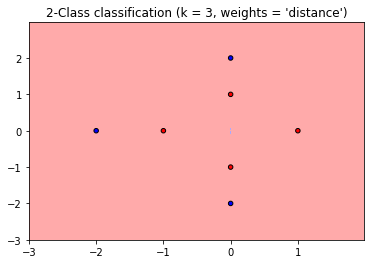

In [16]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

transformed_data = np.array(transform(np.c_[xx.ravel(), yy.ravel()]))
Z = clf.predict(transformed_data)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'distance'))

plt.show()

## Running knn with neighbours = 3 

In [17]:
n_neighbors = 3
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(Z_data, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## Plotting the decision boundaries for knn with neighbours = 3:

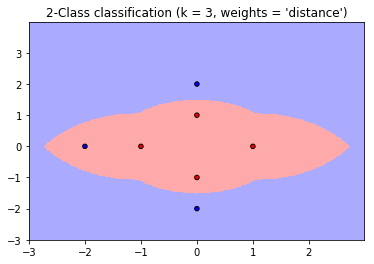

In [18]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

transformed_data = np.array(transform(np.c_[xx.ravel(), yy.ravel()]))
Z = clf.predict(transformed_data)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'distance'))

plt.show()